Many fundamental features of authorial style can be implemented as simple functions over counts of words and sentences.  In this homework, you'll be implementing these functions to measure stylistic properties of a text.

For a detailed history of many of these techniques, see Grieve 2005, "[Quantiative Authorship Attribution: A History and Evaluation of Techniques](https://summit.sfu.ca/_flysystem/fedora/sfu_migrate/8840/etd1721.pdf)" (note this was a master's thesis).

Before working on this notebook, install seaborn:

```conda install seaborn```

This homework has 3 required questions (Q1-3) and one optional "check-plus" question (Q4) at the end.


First, let's read in some works of fiction by three different authors: [Henry James](https://en.wikipedia.org/wiki/Henry_James), [Jane Austen](https://en.wikipedia.org/wiki/Jane_Austen) and [Horatio Alger](https://en.wikipedia.org/wiki/Horatio_Alger).

In [1]:
james=[]
for filename in ["../data/stylometry/208_daisy_miller_a_study.txt", "../data/stylometry/432_the_ambassadors.txt", "../data/stylometry/209_the_turn_of_the_screw.txt"]:
    with open(filename, encoding='utf-8') as file:
        james.append(file.read())

austen=[]
for filename in ["../data/stylometry/158_emma.txt", "../data/stylometry/105_persuasion.txt", "../data/stylometry/1342_pride_and_prejudice.txt"]:
    with open(filename, encoding='utf-8') as file:
        austen.append(file.read())

        
alger=[]
for filename in ["../data/stylometry/18581_adrift_in_new_york_tom_and_florence_braving_the_world.txt", "../data/stylometry/5348_ragged_dick_or_street_life_in_new_york_with_the_bootblacks.txt", "../data/stylometry/21632_fame.txt"]:
    with open(filename, encoding='utf-8') as file:
        alger.append(file.read())


In [7]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lib_laptop\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

**Q1.** First, implement the average sentence length.  Write a function that takes a single text as input and returns the average length of sentences within it using `nltk.tokenize.word_tokenize` and `nltk.tokenize.sent_tokenize`.  The output should be a single real number.  

In [18]:
def get_avg_sentence_length(text):
    sentences = nltk.tokenize.sent_tokenize(text) # break into sentences
#     print(sentences)
    sentence_length = []
    for i in sentences:
        tokens = nltk.tokenize.word_tokenize(i)
#         print(tokens)
        sentence_length.append(len(tokens))
    return np.average(sentence_length)
        

Test that function on texts by James, Austen and Alger (just execute this cell):

In [19]:
for book in james:
    avg_sents=get_avg_sentence_length(book)
    print("James avg sentences: %.3f" % avg_sents)

for book in austen:
    avg_sents=get_avg_sentence_length(book)
    print("Austen avg sentences: %.3f" % avg_sents)

for book in alger:
    avg_sents=get_avg_sentence_length(book)
    print("Alger avg sentences: %.3f" % avg_sents)

James avg sentences: 23.482
James avg sentences: 21.118
James avg sentences: 30.821
Austen avg sentences: 32.223
Austen avg sentences: 26.785
Austen avg sentences: 30.496
Alger avg sentences: 13.628
Alger avg sentences: 15.989
Alger avg sentences: 14.881


In [20]:
get_avg_sentence_length("OMG, Hi! I'm Xiaowen, nice to meet you.")

6.5

**Q2**: Use the `nltk.word_tokenize` method to implement the type-token ratio (a measure of vocabulary diversity):

$$
\textrm{TTR} = {\textrm{number of distinct word types} \over \textrm{number of word tokens}}
$$


TTR is dependent on text length (intuitively, the longer a text is, the greater chance you have of a word type repeating), so this number is only comparable between documents of identical lengths.  Calculate this measure for the first 500 words of you document and report the results here. Exclude tokens that are exclusively punctuation from all counts, and calculate this measure over the lowercased version of that text.  (You can find puncutation with `string.punctuation`.)  Your `type_token_ratio` function should take a single input as argument (a text at least 500 tokens long) and output a single real number (the TTR for that text).


In [27]:
from collections import Counter
import string

def type_token_ratio(text, num_words=500):
    # extract the first 500 words
    # break into tokens and remove punctuation
    # put the text into lowercase and calculate 
    extracted_text = text[:501]
    extracted_text_no_punc_lower = extracted_text.translate(string.punctuation).lower()
    tokens = nltk.tokenize.word_tokenize(extracted_text_no_punc_lower)
    return len(Counter(tokens).keys())/len(tokens)
    
    
    
    

Again, test that function on texts by James, Austen and Alger (just execute this cell):

In [28]:
for book in james:
    ttr=type_token_ratio(book)
    print("James avg: %.3f" % ttr)

for book in austen:
    ttr=type_token_ratio(book)
    print("Austen avg: %.3f" % ttr)

for book in alger:
    ttr=type_token_ratio(book)
    print("Alger avg: %.3f" % ttr)
    

James avg: 0.621
James avg: 0.759
James avg: 0.630
Austen avg: 0.703
Austen avg: 0.776
Austen avg: 0.717
Alger avg: 0.520
Alger avg: 0.661
Alger avg: 0.784


In [30]:
type_token_ratio("to be or not to be")

0.6666666666666666

**Q3.** Finally, count up the token frequency of function words (these are determiners like "the", prepositions like "in" and conjunctions like "and" and "because").  Let's approximate "function words" by counting the token frequency of `nltk.corpus.stopwords`.  Here's that list:

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))
print(len(nltk_stopwords), nltk_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lib_laptop\AppData\Roaming\nltk_data...


179 {'that', 'over', 'me', 'are', 'into', 'she', 'm', 'there', 'just', 'can', 'once', 'him', 'have', 'own', 'at', 'we', 'your', 'with', 'yourselves', 'y', "hadn't", 'don', 'wouldn', "needn't", 'if', 'no', 'each', 'few', "you'd", 'of', 'before', 'under', 'from', 'will', 'too', 'their', "should've", "won't", "that'll", 'these', 'to', 'is', "aren't", 'because', 'isn', 'about', 'here', "she's", 'do', 'why', 'further', 'nor', "it's", 'i', 'doing', 'couldn', 'does', "you'll", 'most', 'hers', 'his', 'won', 'then', 'll', 've', 'haven', 'whom', 'ourselves', 'below', 'as', 'which', 'than', 'had', 'between', 'itself', "mightn't", 'when', 'ma', 'be', "couldn't", 'who', 'where', 'yours', 'they', 'aren', 'was', 'it', "didn't", 'both', "isn't", "shan't", 'has', 'or', 'other', 'were', 'a', 't', 'being', 'for', 'after', 'any', 'those', 'up', 'd', 'only', 'what', 'them', 'during', 'off', 'down', 'above', 's', 'all', 'by', 'until', 'didn', 'himself', 're', "weren't", 'not', 'in', 'its', 'myself', 'my', '

[nltk_data]   Unzipping corpora\stopwords.zip.


Write a function `count_stopword_freqs` that takes a single text as input and returns a dictionary containing frequency of each of these terms within it -- e.g.:

{"wouldn": 0.00003, ..., "are": 0.0004}

Frequency is simply the count of that term in the text divided by the count of all tokens in the text.

In [48]:
def count_stopwords_freqs(book):
    # tokenize the book
    # go over each element in the book, if it's in stopwords, add to the dictionary
    lower_book = book.lower()
    tokens = nltk.tokenize.word_tokenize(lower_book)
    stopwords_freq = dict.fromkeys(nltk_stopwords, 0)
    for i in tokens:
        if i in nltk_stopwords:
            stopwords_freq[i] += (1/len(tokens))
    return stopwords_freq

Again, test that function on texts by James, Austen and Alger (just execute this cell):

In [49]:
for book in james:
    freqs=count_stopwords_freqs(book)
    print("James 'because': %.5f" % freqs["because"])

for book in austen:
    freqs=count_stopwords_freqs(book)
    print("Austen 'because': %.5f" % freqs["because"])

for book in alger:
    freqs=count_stopwords_freqs(book)
    print("Alger 'because': %.5f" % freqs["because"])

James 'because': 0.00026
James 'because': 0.00048
James 'because': 0.00025
Austen 'because': 0.00028
Austen 'because': 0.00027
Austen 'because': 0.00044
Alger 'because': 0.00037
Alger 'because': 0.00034
Alger 'because': 0.00052


In [50]:
count_stopwords_freqs("The nightmare wouldn't come to me")

{'that': 0,
 'over': 0,
 'me': 0.14285714285714285,
 'are': 0,
 'into': 0,
 'she': 0,
 'm': 0,
 'there': 0,
 'just': 0,
 'can': 0,
 'once': 0,
 'him': 0,
 'have': 0,
 'own': 0,
 'at': 0,
 'we': 0,
 'your': 0,
 'with': 0,
 'yourselves': 0,
 'y': 0,
 "hadn't": 0,
 'don': 0,
 'wouldn': 0,
 "needn't": 0,
 'if': 0,
 'no': 0,
 'each': 0,
 'few': 0,
 "you'd": 0,
 'of': 0,
 'before': 0,
 'under': 0,
 'from': 0,
 'will': 0,
 'too': 0,
 'their': 0,
 "should've": 0,
 "won't": 0,
 "that'll": 0,
 'these': 0,
 'to': 0.14285714285714285,
 'is': 0,
 "aren't": 0,
 'because': 0,
 'isn': 0,
 'about': 0,
 'here': 0,
 "she's": 0,
 'do': 0,
 'why': 0,
 'further': 0,
 'nor': 0,
 "it's": 0,
 'i': 0,
 'doing': 0,
 'couldn': 0,
 'does': 0,
 "you'll": 0,
 'most': 0,
 'hers': 0,
 'his': 0,
 'won': 0,
 'then': 0,
 'll': 0,
 've': 0,
 'haven': 0,
 'whom': 0,
 'ourselves': 0,
 'below': 0,
 'as': 0,
 'which': 0,
 'than': 0,
 'had': 0,
 'between': 0,
 'itself': 0,
 "mightn't": 0,
 'when': 0,
 'ma': 0,
 'be': 0,
 "coul

The functions you wrote now give you a way represent a text as a vector of stylistic features.  Let's see how we can use that to compare the similarity of styles between the three authors above.

In [51]:
def featurize_style(text):
    vec=[]
    vec.append(get_avg_sentence_length(text))
    vec.append(type_token_ratio(text))
    stopword_freq=count_stopwords_freqs(text)
    for stop in set(stopwords.words('english')):
        if stop in stopword_freq:
            vec.append(stopword_freq[stop])
        else:
            vec.append(0)
    return vec

In [52]:
all_vecs=[]
for book in james:
    all_vecs.append(featurize_style(book))

for book in austen:
    all_vecs.append(featurize_style(book))

for book in alger:
    all_vecs.append(featurize_style(book))


We're going to compare the style vector for each book with each other, comparing them via cosine similarity. To give equal weight to each style dimension, we'll normalize each feature to its z score (with respect to the value of that feature across all observations).

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_vecs)
all_vecs=scaler.transform(all_vecs)

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

In [55]:
sims=cosine_similarity(all_vecs, all_vecs)

Now let's visualize those similarites as a heatmap.

In [56]:
import seaborn as sns
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


In [57]:
names=["james1", "james2", "james3", "austen1", "austen2", "austen3", "alger1", "alger2", "alger3"]
df = pd.DataFrame(sims, columns=names)

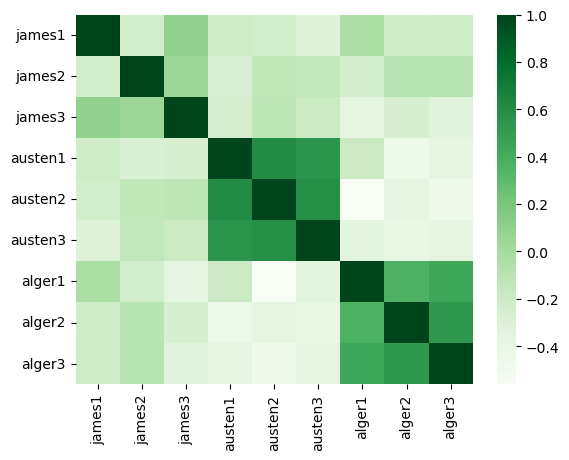

In [58]:
p1 = sns.heatmap(df, cmap="Greens", xticklabels=names, yticklabels=names)

Q4 **(check-plus)**: From the Grieve 2005, "[Quantiative Authorship Attribution: A History and Evaluation of Techniques](https://summit.sfu.ca/_flysystem/fedora/sfu_migrate/8840/etd1721.pdf)" paper referenced above, pick one other stylistic feature and implement it.  As with the other stylistic measures, run it on the 9 books above; does it differentiate those authors?